In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
DATASET_DIR = '../kaggle-dataset'
train_df = pd.read_csv(os.path.join(DATASET_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATASET_DIR, 'test.csv'))
# train_df = train_df.drop(['Unnamed: 0'], axis=1)

neg_df = train_df.loc[train_df['Class']==0]
pos_df = train_df.loc[train_df['Class']==1]

train_df_balanced = pd.concat([neg_df[:len(pos_df)], pos_df], ignore_index=True)

## Random Forest Classifier (Unbalanced)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Class',axis=1), 
                                                    train_df['Class'], test_size=0.10, 
                                                    random_state=2309)
print(len(X_train))
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
predictions = rfmodel.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

231136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25650
           1       0.83      0.75      0.79        32

    accuracy                           1.00     25682
   macro avg       0.91      0.87      0.89     25682
weighted avg       1.00      1.00      1.00     25682



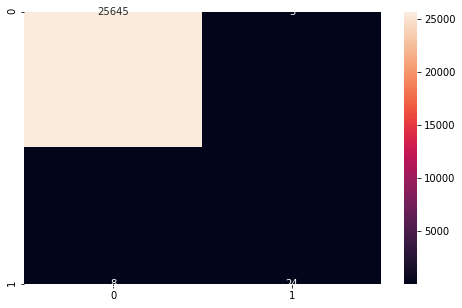

In [6]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test,predictions)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [7]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.8275862068965517
recall 0.75
F1 score 0.7868852459016394


In [8]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.9994938088933883 
 The Missclassification = 1-Accuracy =                      0.0005061911066116531 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           0.75 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.9998050682261208 
 Precision (PPV) = TP/(TP+FP) =                             0.8275862068965517 
 Precision for negative class (NPV) = TN/(TN+FN) =          0.999688145635988 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3847.499999999014 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.25004874244492103


## Random Forest Classifier (Balanced training set)

In [9]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = \
                                            train_test_split(train_df_balanced.drop('Class',axis=1), 
                                            train_df_balanced['Class'], 
                                            test_size=0.10, 
#                                                     solver='saga',
                                            random_state=2309)
# print(len(X_train_balanced))

from sklearn import preprocessing
X_without_time = X_train_balanced.drop('Time',axis=1).values

scaler = preprocessing.StandardScaler().fit(X_without_time)

X_without_time = scaler.transform(X_without_time)
X_time_only = np.expand_dims(X_train_balanced['Time'].values, axis=1)

# print(np.expand_dims(X_train_balanced['Time'].values, axis=1).shape)
# print(X_without_time.shape)

X_train_scaled = np.concatenate([X_time_only,X_without_time],axis=1)

# print(X_train_scaled.shape)
# X_train_scaled = X_train_balanced
# print(X_train_scaled)

rfmodel_balanced = RandomForestClassifier()
rfmodel_balanced.fit(X_train_scaled,y_train_balanced)

predictions_balanced = rfmodel_balanced.predict(X_test_balanced)


from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,predictions_balanced))



              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.95      1.00      0.98        41

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



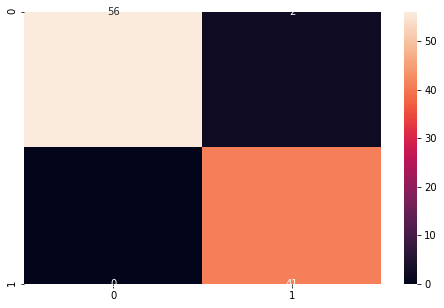

In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test_balanced,predictions_balanced)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [11]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.9534883720930233
recall 1.0
F1 score 0.9761904761904763


In [12]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.9797979797979798 
 The Missclassification = 1-Accuracy =                      0.02020202020202022 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.9655172413793104 
 Precision (PPV) = TP/(TP+FP) =                             0.9534883720930233 
 Precision for negative class (NPV) = TN/(TN+FN) =          1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  29.000000000000036 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


In [14]:
y_pred_prob_positive=rfmodel_balanced.predict_proba(X_test_balanced)
# print(y_pred_prob_positive)
# print(sum(y_pred_prob_positive[0]))

In [16]:
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=rfmodel_balanced.predict_proba(X_test_balanced)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test_balanced,y_pred2)
    print ('Threshold =',i/10,'\nConfusion Matrix: ','\n',cm2,'\n',
            cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'False Negatives','\n\n',
          'Sensitivity (TPR): ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity (TNR): ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

Threshold = 0.0 
Confusion Matrix:  
 [[ 0 58]
 [ 0 41]] 
 41 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.0 



Threshold = 0.1 
Confusion Matrix:  
 [[ 0 58]
 [ 0 41]] 
 41 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.0 



Threshold = 0.2 
Confusion Matrix:  
 [[ 2 56]
 [ 0 41]] 
 43 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.034482758620689655 



Threshold = 0.3 
Confusion Matrix:  
 [[ 7 51]
 [ 0 41]] 
 48 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.1206896551724138 



Threshold = 0.4 
Confusion Matrix:  
 [[40 18]
 [ 0 41]] 
 81 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.6896551724137931 



Threshold = 0.5 
Confusion Matrix:  
 [[56  2]
 [ 0 41]] 
 97 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.96551

/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-pack

In [23]:
# from sklearn.metrics import roc_curve
# print(set(y_test_balanced))
# fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_prob_positive[:,1])
# print(fpr)
# print(tpr)
# print(thresholds)
# plt.plot(fpr,tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve for Fraud classifier')
# plt.xlabel('False positive rate (1-Specificity)')
# plt.ylabel('True positive rate (Sensitivity)')
# plt.grid(True)

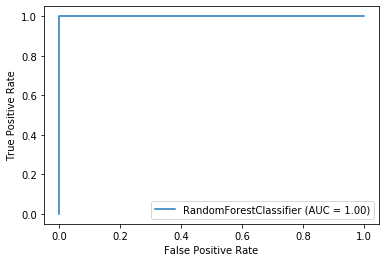

In [17]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(rfmodel_balanced, X_test_balanced, y_test_balanced)  
plt.savefig('random_forest_roc_balanced_model.png',bbox_inches='tight', dpi=200)
plt.show()

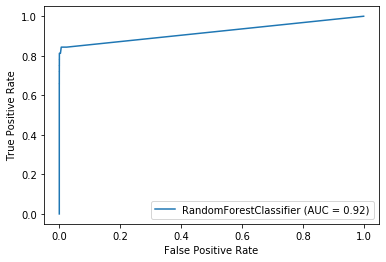

In [18]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(rfmodel, X_test, y_test)  
plt.savefig('random_forest_roc_unbalanced_model.png',bbox_inches='tight', dpi=200)
plt.show()

In [19]:
y_pred_prob_yes_sample=rfmodel_balanced.predict_proba(X_test_balanced.iloc[10].values.reshape(1,-1))
y_pred2_sample=binarize(y_pred_prob_yes,8/10)[:,1]
print(y_pred_prob_yes_sample)

[[0.01 0.99]]


/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Random Forest Classifier (Balanced training set without 'V21' attribute)

In [27]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = \
                                            train_test_split(train_df_balanced.drop(['V21','Class'],axis=1), 
                                            train_df_balanced['Class'], 
                                            test_size=0.10, 
                                            random_state=2309)

from sklearn import preprocessing
X_without_time = X_train_balanced.drop('Time',axis=1).values
scaler = preprocessing.StandardScaler().fit(X_without_time)
X_without_time = scaler.transform(X_without_time)
X_time_only = np.expand_dims(X_train_balanced['Time'].values, axis=1)

X_train_scaled = np.concatenate([X_time_only,X_without_time],axis=1)

rfmodel_balanced = RandomForestClassifier()
rfmodel_balanced.fit(X_train_scaled,y_train_balanced)

predictions_balanced = rfmodel_balanced.predict(X_test_balanced)

from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,predictions_balanced))



              precision    recall  f1-score   support

           0       1.00      0.74      0.85        58
           1       0.73      1.00      0.85        41

    accuracy                           0.85        99
   macro avg       0.87      0.87      0.85        99
weighted avg       0.89      0.85      0.85        99



In [28]:

# _1, X_test, _2, y_test = train_test_split(test_df.drop(['V21','Class'],axis=1), 
#                                             test_df['Class'], 
#                                             test_size=1, 
#                                             random_state=2309)
# predictions_balanced = rfmodel_balanced.predict(X_test)

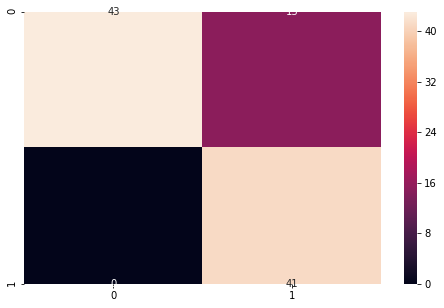

In [29]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test_balanced,predictions_balanced)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [30]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.7321428571428571
recall 1.0
F1 score 0.8453608247422679


In [23]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.0 
 The Missclassification = 1-Accuracy =                      1.0 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           nan 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.0 
 Precision (PPV) = TP/(TP+FP) =                             0.0 
 Precision for negative class (NPV) = TN/(TN+FN) =          nan 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  nan 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  nan


/Users/madhuaithal/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/madhuaithal/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


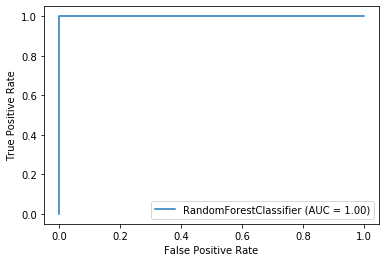

In [27]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(rfmodel_balanced, X_test_balanced, y_test_balanced)  
plt.savefig('random_forest_roc_balanced_model_wo_v21.png', bbox_inches='tight', dpi=200)
plt.show()